In [1]:
import pandas as pd
import numpy as np 

In [3]:
#Reading the csv
df_movie = pd.read_csv('movies_metadata.csv')
df_keyword = pd.read_csv('keywords.csv')
df_credits = pd.read_csv('credits.csv')


C:\Users\lenovo\AppData\Local\Temp\ipykernel_9200\3376919138.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_movie = pd.read_csv('movies_metadata.csv')


In [4]:
df_movie.head(1)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0


In [5]:
df_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [6]:
df_keyword.head(1)

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."


In [7]:
# Convert to numeric, invalid entries become NaN
df_movie['id'] = pd.to_numeric(df_movie['id'], errors='coerce')

# Drop rows where 'id' couldn't be converted (were invalid like '1997-08-20')
df_movie = df_movie.dropna(subset=['id'])

# Convert to int (will work now)
df_movie['id'] = df_movie['id'].astype(int)


In [10]:
#Checking movie columns datatypes
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45463 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45463 non-null  object 
 1   belongs_to_collection  4491 non-null   object 
 2   budget                 45463 non-null  object 
 3   genres                 45463 non-null  object 
 4   homepage               7779 non-null   object 
 5   id                     45463 non-null  int32  
 6   imdb_id                45446 non-null  object 
 7   original_language      45452 non-null  object 
 8   original_title         45463 non-null  object 
 9   overview               44509 non-null  object 
 10  popularity             45460 non-null  object 
 11  poster_path            45077 non-null  object 
 12  production_companies   45460 non-null  object 
 13  production_countries   45460 non-null  object 
 14  release_date           45376 non-null  object 
 15  revenue

In [15]:
#Merging datasets for efficient use

#changing datatypes of credits and keywords so that they can merge easily
df_credits['id'] = df_credits['id'].astype('int32')
df_keyword['id'] = df_keyword['id'].astype('int32')


merged1 = pd.merge(df_movie, df_credits, on='id', how='inner') #merging movie and credits
merged_data = pd.merge(merged1, df_keyword, on='id', how='inner')  #then merging both with keywords 

# View the result
print(merged_data.shape)
merged_data.head(1)


(46628, 27)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,keywords
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."


In [17]:
#Checking merged datasets
merged_data.head(1)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,keywords
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."


In [19]:
# only keeping the most importanat columns for our conntest based recommendation 
movies = merged_data[['id','title','overview','genres','keywords','cast','crew']]

In [21]:
movies.head()

,id,title,overview,genres,keywords,cast,crew
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10090, 'name': 'board game'}, {'id': 1...","[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392...","[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,"[{'id': 35, 'name': 'Comedy'}]","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...","[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


In [23]:
#Checking any Null values and then replacing them
movies.isnull().sum()

id            0
title         4
overview    995
genres        0
keywords      0
cast          0
crew          0
dtype: int64

In [25]:
#droping null values
movies.dropna(inplace = True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9200\772753057.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.dropna(inplace = True)


In [27]:
#Checking if there is any null left
movies.isnull().sum()

id          0
title       0
overview    0
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [29]:
#Checking any duplicated values
check_duplicate = movies.duplicated().sum()
check_duplicate

1147

In [30]:
#Droping the duplicate values
movies = movies.drop_duplicates()


In [33]:
#Checking the genres column 
movies.iloc[0].genres

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

In [35]:
#To convert all the generes in a list like ['Action','Adventure','Fantasy','Science Fiction']
def convert_list(obj):
    return[i["name"] for i in eval(obj)]

In [37]:
#applying it on our datasets
movies['genres'] = movies['genres'].apply(convert_list)

In [38]:
movies.head()

,id,title,overview,genres,keywords,cast,crew
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...","[Animation, Comedy, Family]","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,"[Adventure, Fantasy, Family]","[{'id': 10090, 'name': 'board game'}, {'id': 1...","[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...,"[Romance, Comedy]","[{'id': 1495, 'name': 'fishing'}, {'id': 12392...","[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...","[Comedy, Drama, Romance]","[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,[Comedy],"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...","[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


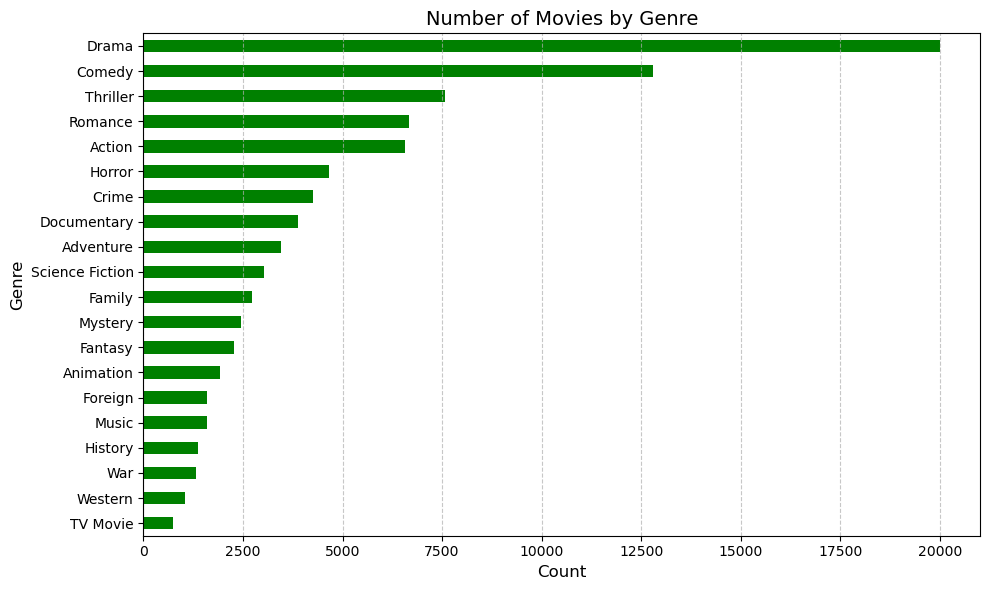

In [39]:
#importing matplotlib 
#Creating a visualisation for our 
import matplotlib.pyplot as plt
import pandas as pd

# Flattening the  genre lists
all_genres = movies['genres'].explode()

#Counting genres values
genre_counts = (
    all_genres.value_counts()
    .sort_values(ascending=False)
)

# Filter
genre_counts = genre_counts[genre_counts.index != '(no genres listed)']
genre_counts = genre_counts[genre_counts > 20]

# Plotting the genres
plt.figure(figsize=(10, 6))  
genre_counts.plot(kind='barh', color='green') # a Bar Graph 
plt.gca().invert_yaxis()
plt.title('Number of Movies by Genre', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [42]:
# Converting keywords into the list
movies['keywords'] =movies['keywords'].apply(convert_list)

In [43]:
movies.head()

,id,title,overview,genres,keywords,cast,crew
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...","[Animation, Comedy, Family]","[jealousy, toy, boy, friendship, friends, riva...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,"[Adventure, Fantasy, Family]","[board game, disappearance, based on children'...","[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...,"[Romance, Comedy]","[fishing, best friend, duringcreditsstinger, o...","[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...","[Comedy, Drama, Romance]","[based on novel, interracial relationship, sin...","[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,[Comedy],"[baby, midlife crisis, confidence, aging, daug...","[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


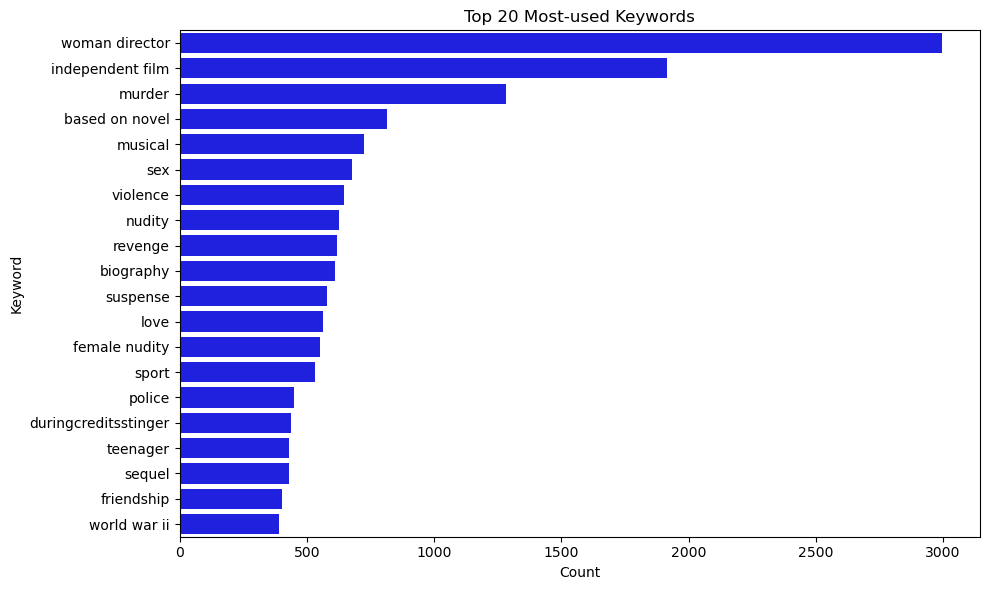

In [44]:
#Visualizing the top 20 most keywords used in our dataset

import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
# Flatten all keywords into a single list
all_keywords = [keyword for sublist in movies['keywords'] for keyword in sublist]

# Count keyword frequency
keyword_counts = Counter(all_keywords)
top_keywords = keyword_counts.most_common(20)

# Prepare data for plotting
keywords, counts = zip(*top_keywords)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=keywords, color='blue')
plt.title('Top 20 Most-used Keywords')
plt.xlabel('Count')
plt.ylabel('Keyword')
plt.tight_layout()
plt.show()


In [47]:
# Cast Conversion into the list
import ast

def convert_cast(obj):
    listt = []
    counter = 0
    if isinstance(obj, str):
        try:
            data = ast.literal_eval(obj)
            for i in data:
                if counter != 3:
                    listt.append(i["name"])
                    counter += 1
                else:
                    break
        except:
            pass
    return listt


In [48]:
movies['cast'] =movies['cast'].apply(convert_cast)

In [49]:
movies.head(10)

,id,title,overview,genres,keywords,cast,crew
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...","[Animation, Comedy, Family]","[jealousy, toy, boy, friendship, friends, riva...","[Tom Hanks, Tim Allen, Don Rickles]","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,"[Adventure, Fantasy, Family]","[board game, disappearance, based on children'...","[Robin Williams, Jonathan Hyde, Kirsten Dunst]","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...,"[Romance, Comedy]","[fishing, best friend, duringcreditsstinger, o...","[Walter Matthau, Jack Lemmon, Ann-Margret]","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...","[Comedy, Drama, Romance]","[based on novel, interracial relationship, sin...","[Whitney Houston, Angela Bassett, Loretta Devine]","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,[Comedy],"[baby, midlife crisis, confidence, aging, daug...","[Steve Martin, Diane Keaton, Martin Short]","[{'credit_id': '52fe44959251416c75039ed7', 'de..."
5,949,Heat,"Obsessive master thief, Neil McCauley leads a ...","[Action, Crime, Drama, Thriller]","[robbery, detective, bank, obsession, chase, s...","[Al Pacino, Robert De Niro, Val Kilmer]","[{'credit_id': '52fe4292c3a36847f802916d', 'de..."
6,11860,Sabrina,An ugly duckling having undergone a remarkable...,"[Comedy, Romance]","[paris, brother brother relationship, chauffeu...","[Harrison Ford, Julia Ormond, Greg Kinnear]","[{'credit_id': '52fe44959251416c75039da9', 'de..."
7,45325,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...","[Action, Adventure, Drama, Family]",[],"[Jonathan Taylor Thomas, Brad Renfro, Rachael ...","[{'credit_id': '52fe46bdc3a36847f810f797', 'de..."
8,9091,Sudden Death,International action superstar Jean Claude Van...,"[Action, Adventure, Thriller]","[terrorist, hostage, explosive, vice president]","[Jean-Claude Van Damme, Powers Boothe, Dorian ...","[{'credit_id': '52fe44dbc3a36847f80ae0f1', 'de..."
9,710,GoldenEye,James Bond must unmask the mysterious head of ...,"[Adventure, Action, Thriller]","[cuba, falsely accused, secret identity, compu...","[Pierce Brosnan, Sean Bean, Izabella Scorupco]","[{'credit_id': '52fe426ec3a36847f801e14b', 'de..."


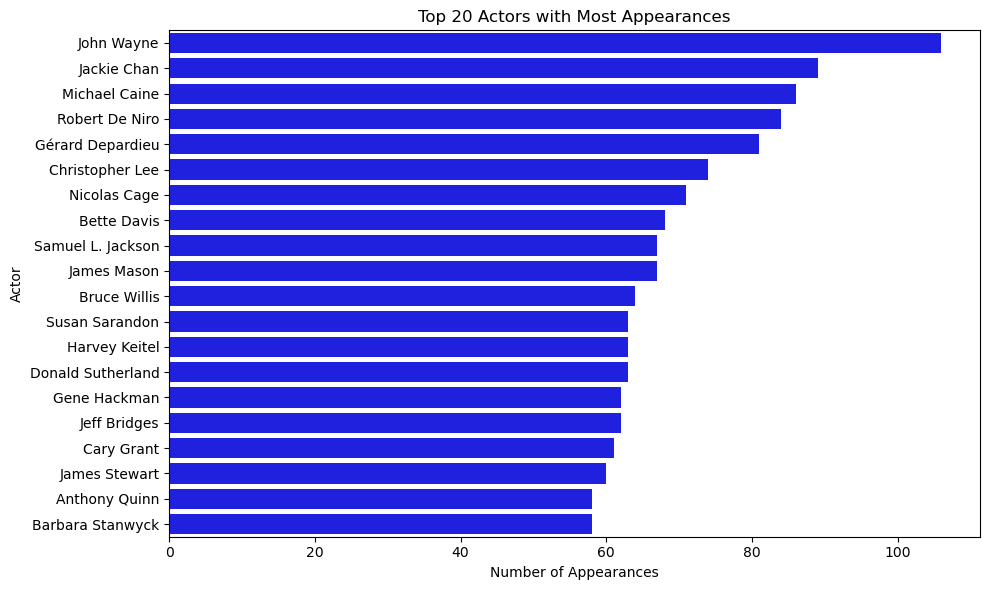

In [52]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Flatten all actor names into a single list
actors = [actor for sublist in movies['cast'] for actor in sublist]

# Count actor frequency
actor_counts = Counter(actors)
top_actors = actor_counts.most_common(20)

# Prepare data for plotting
actors, counts = zip(*top_actors)

# Plotting our plot
plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=actors, color='blue')
plt.title('Top 20 Actors with Most Appearances')
plt.xlabel('Number of Appearances')
plt.ylabel('Actor')
plt.tight_layout()
plt.show()


In [53]:
movies['crew'][0]

'[{\'credit_id\': \'52fe4284c3a36847f8024f49\', \'department\': \'Directing\', \'gender\': 2, \'id\': 7879, \'job\': \'Director\', \'name\': \'John Lasseter\', \'profile_path\': \'/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f4f\', \'department\': \'Writing\', \'gender\': 2, \'id\': 12891, \'job\': \'Screenplay\', \'name\': \'Joss Whedon\', \'profile_path\': \'/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f55\', \'department\': \'Writing\', \'gender\': 2, \'id\': 7, \'job\': \'Screenplay\', \'name\': \'Andrew Stanton\', \'profile_path\': \'/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f5b\', \'department\': \'Writing\', \'gender\': 2, \'id\': 12892, \'job\': \'Screenplay\', \'name\': \'Joel Cohen\', \'profile_path\': \'/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f61\', \'department\': \'Writing\', \'gender\': 0, \'id\': 12893, \'job\': \'Screenplay\', \'name\': \'A

In [54]:
#fetching director of movies

import ast
def find_crew_director(obj):
    L =[]
    for i in ast.literal_eval(obj):
        if i['job'] =='Director':
            L.append(i['name'])
            break
    return L
   

In [55]:
#Aplying this on our dataset
movies['crew']=movies['crew'].apply(find_crew_director)

In [58]:
movies.head()

,id,title,overview,genres,keywords,cast,crew
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...","[Animation, Comedy, Family]","[jealousy, toy, boy, friendship, friends, riva...","[Tom Hanks, Tim Allen, Don Rickles]",[John Lasseter]
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,"[Adventure, Fantasy, Family]","[board game, disappearance, based on children'...","[Robin Williams, Jonathan Hyde, Kirsten Dunst]",[Joe Johnston]
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...,"[Romance, Comedy]","[fishing, best friend, duringcreditsstinger, o...","[Walter Matthau, Jack Lemmon, Ann-Margret]",[Howard Deutch]
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...","[Comedy, Drama, Romance]","[based on novel, interracial relationship, sin...","[Whitney Houston, Angela Bassett, Loretta Devine]",[Forest Whitaker]
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,[Comedy],"[baby, midlife crisis, confidence, aging, daug...","[Steve Martin, Diane Keaton, Martin Short]",[Charles Shyer]


In [59]:
#Coverting overview into list
movies['overview'] =movies['overview'].apply(lambda x:x.split())

In [60]:
movies.head()

,id,title,overview,genres,keywords,cast,crew
0,862,Toy Story,"[Led, by, Woody,, Andy's, toys, live, happily,...","[Animation, Comedy, Family]","[jealousy, toy, boy, friendship, friends, riva...","[Tom Hanks, Tim Allen, Don Rickles]",[John Lasseter]
1,8844,Jumanji,"[When, siblings, Judy, and, Peter, discover, a...","[Adventure, Fantasy, Family]","[board game, disappearance, based on children'...","[Robin Williams, Jonathan Hyde, Kirsten Dunst]",[Joe Johnston]
2,15602,Grumpier Old Men,"[A, family, wedding, reignites, the, ancient, ...","[Romance, Comedy]","[fishing, best friend, duringcreditsstinger, o...","[Walter Matthau, Jack Lemmon, Ann-Margret]",[Howard Deutch]
3,31357,Waiting to Exhale,"[Cheated, on,, mistreated, and, stepped, on,, ...","[Comedy, Drama, Romance]","[based on novel, interracial relationship, sin...","[Whitney Houston, Angela Bassett, Loretta Devine]",[Forest Whitaker]
4,11862,Father of the Bride Part II,"[Just, when, George, Banks, has, recovered, fr...",[Comedy],"[baby, midlife crisis, confidence, aging, daug...","[Steve Martin, Diane Keaton, Martin Short]",[Charles Shyer]


In [61]:
#Applying transformations to remove spaces in 1 word making it a single entity so that our model 
#will not get confused when we will create tags on which one to choose

movies['genres'] =movies['genres'].apply(lambda x:[i.replace(" ","")for i in x])

In [62]:
movies.head()

,id,title,overview,genres,keywords,cast,crew
0,862,Toy Story,"[Led, by, Woody,, Andy's, toys, live, happily,...","[Animation, Comedy, Family]","[jealousy, toy, boy, friendship, friends, riva...","[Tom Hanks, Tim Allen, Don Rickles]",[John Lasseter]
1,8844,Jumanji,"[When, siblings, Judy, and, Peter, discover, a...","[Adventure, Fantasy, Family]","[board game, disappearance, based on children'...","[Robin Williams, Jonathan Hyde, Kirsten Dunst]",[Joe Johnston]
2,15602,Grumpier Old Men,"[A, family, wedding, reignites, the, ancient, ...","[Romance, Comedy]","[fishing, best friend, duringcreditsstinger, o...","[Walter Matthau, Jack Lemmon, Ann-Margret]",[Howard Deutch]
3,31357,Waiting to Exhale,"[Cheated, on,, mistreated, and, stepped, on,, ...","[Comedy, Drama, Romance]","[based on novel, interracial relationship, sin...","[Whitney Houston, Angela Bassett, Loretta Devine]",[Forest Whitaker]
4,11862,Father of the Bride Part II,"[Just, when, George, Banks, has, recovered, fr...",[Comedy],"[baby, midlife crisis, confidence, aging, daug...","[Steve Martin, Diane Keaton, Martin Short]",[Charles Shyer]


In [63]:
#Applying on keywords
movies['keywords'] =movies['keywords'].apply(lambda x:[i.replace(" ","")for i in x])
movies['cast'] =movies['cast'].apply(lambda x:[i.replace(" ","")for i in x])
movies['crew'] =movies['crew'].apply(lambda x:[i.replace(" ","")for i in x])

In [64]:
movies.head()

,id,title,overview,genres,keywords,cast,crew
0,862,Toy Story,"[Led, by, Woody,, Andy's, toys, live, happily,...","[Animation, Comedy, Family]","[jealousy, toy, boy, friendship, friends, riva...","[TomHanks, TimAllen, DonRickles]",[JohnLasseter]
1,8844,Jumanji,"[When, siblings, Judy, and, Peter, discover, a...","[Adventure, Fantasy, Family]","[boardgame, disappearance, basedonchildren'sbo...","[RobinWilliams, JonathanHyde, KirstenDunst]",[JoeJohnston]
2,15602,Grumpier Old Men,"[A, family, wedding, reignites, the, ancient, ...","[Romance, Comedy]","[fishing, bestfriend, duringcreditsstinger, ol...","[WalterMatthau, JackLemmon, Ann-Margret]",[HowardDeutch]
3,31357,Waiting to Exhale,"[Cheated, on,, mistreated, and, stepped, on,, ...","[Comedy, Drama, Romance]","[basedonnovel, interracialrelationship, single...","[WhitneyHouston, AngelaBassett, LorettaDevine]",[ForestWhitaker]
4,11862,Father of the Bride Part II,"[Just, when, George, Banks, has, recovered, fr...",[Comedy],"[baby, midlifecrisis, confidence, aging, daugh...","[SteveMartin, DianeKeaton, MartinShort]",[CharlesShyer]


In [65]:
#Creating a tags column  combining the overview,genres,keywords,cast and crew
movies['tags'] = movies['overview'] +movies['genres']+movies['keywords']+movies['cast']+movies['crew']

In [66]:
movies.head()

,id,title,overview,genres,keywords,cast,crew,tags
0,862,Toy Story,"[Led, by, Woody,, Andy's, toys, live, happily,...","[Animation, Comedy, Family]","[jealousy, toy, boy, friendship, friends, riva...","[TomHanks, TimAllen, DonRickles]",[JohnLasseter],"[Led, by, Woody,, Andy's, toys, live, happily,..."
1,8844,Jumanji,"[When, siblings, Judy, and, Peter, discover, a...","[Adventure, Fantasy, Family]","[boardgame, disappearance, basedonchildren'sbo...","[RobinWilliams, JonathanHyde, KirstenDunst]",[JoeJohnston],"[When, siblings, Judy, and, Peter, discover, a..."
2,15602,Grumpier Old Men,"[A, family, wedding, reignites, the, ancient, ...","[Romance, Comedy]","[fishing, bestfriend, duringcreditsstinger, ol...","[WalterMatthau, JackLemmon, Ann-Margret]",[HowardDeutch],"[A, family, wedding, reignites, the, ancient, ..."
3,31357,Waiting to Exhale,"[Cheated, on,, mistreated, and, stepped, on,, ...","[Comedy, Drama, Romance]","[basedonnovel, interracialrelationship, single...","[WhitneyHouston, AngelaBassett, LorettaDevine]",[ForestWhitaker],"[Cheated, on,, mistreated, and, stepped, on,, ..."
4,11862,Father of the Bride Part II,"[Just, when, George, Banks, has, recovered, fr...",[Comedy],"[baby, midlifecrisis, confidence, aging, daugh...","[SteveMartin, DianeKeaton, MartinShort]",[CharlesShyer],"[Just, when, George, Banks, has, recovered, fr..."


In [67]:
#Creating a new dataframe with id,Title and Tags
new_dataframe = movies[['id','title','tags']]

In [68]:
new_dataframe

,id,title,tags
0,862,Toy Story,"[Led, by, Woody,, Andy's, toys, live, happily,..."
1,8844,Jumanji,"[When, siblings, Judy, and, Peter, discover, a..."
2,15602,Grumpier Old Men,"[A, family, wedding, reignites, the, ancient, ..."
3,31357,Waiting to Exhale,"[Cheated, on,, mistreated, and, stepped, on,, ..."
4,11862,Father of the Bride Part II,"[Just, when, George, Banks, has, recovered, fr..."
...,...,...,...
46623,439050,Subdue,"[Rising, and, falling, between, a, man, and, w..."
46624,111109,Century of Birthing,"[An, artist, struggles, to, finish, his, work,..."
46625,67758,Betrayal,"[When, one, of, her, hits, goes, wrong,, a, pr..."
46626,227506,Satan Triumphant,"[In, a, small, town, live, two, brothers,, one..."


In [69]:
# Removing  the spaces so that tags will looks like this ['love','drama','romance'] --> ['love drama romance']
new_dataframe['tags'] =new_dataframe['tags'].apply(lambda x:" ".join(x))

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9200\1302549699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataframe['tags'] =new_dataframe['tags'].apply(lambda x:" ".join(x))


In [70]:
new_dataframe.head()

,id,title,tags
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
1,8844,Jumanji,When siblings Judy and Peter discover an encha...
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom..."
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...


In [71]:
#Checking the first column
new_dataframe['tags'][0]

"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences. Animation Comedy Family jealousy toy boy friendship friends rivalry boynextdoor newtoy toycomestolife TomHanks TimAllen DonRickles JohnLasseter"

In [72]:
#Converting all the tags into a lower case letters
new_dataframe['tags'] =new_dataframe['tags'].apply(lambda x:x.lower())

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9200\1088466642.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataframe['tags'] =new_dataframe['tags'].apply(lambda x:x.lower())


In [73]:
new_dataframe.head()

,id,title,tags
0,862,Toy Story,"led by woody, andy's toys live happily in his ..."
1,8844,Jumanji,when siblings judy and peter discover an encha...
2,15602,Grumpier Old Men,a family wedding reignites the ancient feud be...
3,31357,Waiting to Exhale,"cheated on, mistreated and stepped on, the wom..."
4,11862,Father of the Bride Part II,just when george banks has recovered from his ...


In [74]:
 # Vectorization 
#Importing CountVectorizer Class
from sklearn.feature_extraction.text import CountVectorizer  # it is used for text vectorization in NLP 

cv = CountVectorizer(max_features = 5000,stop_words ='english') #Taking top 500 most frequent  words in our dataset and also removing english words
                                                                #like the,and,in etc..

In [75]:
#Transforming it imnto a document term matrix
vector= cv.fit_transform(new_dataframe['tags'])

In [76]:
vector

<44482x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 1070261 stored elements in Compressed Sparse Row format>

In [77]:
# Gives an array of our word Features 
cv.get_feature_names_out() 

array(['000', '10', '100', ..., 'zombies', 'zone', 'zoo'], dtype=object)

In [78]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [79]:
import nltk

In [80]:
#Importing PostStemmer from our library 
#Here  we are doing stemming (process of reducing words to their base e.g= playing reduced to play )
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()  #Creating an instance of PorterStemmer

In [81]:
def stemming(text):
    y=[]

    for i in text.split():
        y.append(ps.stem(i))

    return" ".join(y)
    #It splits our string  and then do stemming on it 

In [82]:
#An example 
ps.stem('loving')

'love'

In [83]:
#Applying stemming on our tags column 
new_dataframe['tags'] =new_dataframe['tags'].apply(stemming)


C:\Users\lenovo\AppData\Local\Temp\ipykernel_9200\2041306878.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataframe['tags'] =new_dataframe['tags'].apply(stemming)


In [84]:
#Now get our featues names out 
cv.get_feature_names_out()

array(['000', '10', '100', ..., 'zombies', 'zone', 'zoo'], dtype=object)

In [85]:
#Tokenization and removing the punctuations

import nltk
from nltk.tokenize import word_tokenize  #a function that splits texts into tokens
import string

nltk.download('punkt')  #Doenloading the tokenizer model

def preprocess(text):
    text = text.lower() #lowercase conversion 
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    return word_tokenize(text) # Tokeniztaion 

#Applying the preprocess to our dataframe 
new_dataframe['tokens'] = new_dataframe['tags'].apply(preprocess)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\lenovo\AppData\Local\Temp\ipykernel_9200\2209043530.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataframe['tokens'] = new_dataframe['tags'].apply(preprocess)


In [86]:
#Vectorization 

from sklearn.metrics.pairwise import cosine_similarity #importing cosine similarity

In [87]:
#Computing the cosine similarity between one specific vectors and all the vectors in a list 
finding_similarity = cosine_similarity(vector[0:1], vector)
# taking vector[0:1] = slicing the first vector from our array or matrix
#cosine_similarity(vector[0:1], vector) comparing first vector to every vector

In [88]:
#Calculating the similarity
finding_similarity[0]  

array([1.        , 0.048795  , 0.05423261, ..., 0.        , 0.01767767,
       0.        ])

In [89]:
#Finding the shape of first 
finding_similarity[0].shape

(44482,)

In [90]:
# finds the hishest cosine similarity score  
sorted(finding_similarity[0])[-1]

1.0000000000000004

In [91]:
sorted(finding_similarity[0],reverse =True) #doing sorting we lose the index value from above

[1.0000000000000004,
 0.400693842672377,
 0.3879701448994927,
 0.3529432893783948,
 0.3408228586736446,
 0.32791291789197646,
 0.3162277660168379,
 0.29880715233359845,
 0.2635231383473649,
 0.25391668753850405,
 0.24904882343768706,
 0.23717082451262844,
 0.23008949665421116,
 0.22360679774997896,
 0.21957751641342,
 0.2191252450446388,
 0.21718612138153467,
 0.21693045781865614,
 0.21452908258025827,
 0.21380899352993948,
 0.21213203435596426,
 0.21213203435596426,
 0.21128856368212917,
 0.21081851067789195,
 0.21081851067789195,
 0.20701966780270628,
 0.20254787341673333,
 0.2,
 0.2,
 0.19999999999999998,
 0.19764235376052372,
 0.1976423537605237,
 0.19518001458970666,
 0.19364916731037085,
 0.19364916731037085,
 0.19364916731037085,
 0.19069251784911848,
 0.19069251784911848,
 0.19069251784911848,
 0.19069251784911845,
 0.1897366596101028,
 0.18856180831641267,
 0.18848425873126295,
 0.18708286933869708,
 0.18605210188381271,
 0.1825741858350554,
 0.1825741858350554,
 0.18257418583

In [92]:
enumerate(finding_similarity[0]) #making object of it

In [93]:
list(enumerate(finding_similarity[0]))#converting in a list

[(0, 1.0000000000000004),
 (1, 0.048795003647426664),
 (2, 0.05423261445466404),
 (3, 0.06900655593423542),
 (4, 0.026352313834736494),
 (5, 0.0),
 (6, 0.0372677996249965),
 (7, 0.13837968120433278),
 (8, 0.0),
 (9, 0.0),
 (10, 0.0316227766016838),
 (11, 0.03627381250550058),
 (12, 0.0674199862463242),
 (13, 0.0),
 (14, 0.0),
 (15, 0.0),
 (16, 0.0),
 (17, 0.09890707100936805),
 (18, 0.031008683647302117),
 (19, 0.03296902366978935),
 (20, 0.03580574370197164),
 (21, 0.0),
 (22, 0.021926450482675733),
 (23, 0.0),
 (24, 0.027524094128159017),
 (25, 0.07905694150420949),
 (26, 0.060858061945018464),
 (27, 0.043852900965351466),
 (28, 0.029361010975735173),
 (29, 0.055048188256318034),
 (30, 0.0),
 (31, 0.0),
 (32, 0.10564428184106459),
 (33, 0.0),
 (34, 0.0),
 (35, 0.06984302957695782),
 (36, 0.06454972243679029),
 (37, 0.02988071523335984),
 (38, 0.0),
 (39, 0.0),
 (40, 0.0),
 (41, 0.02974820586543648),
 (42, 0.0),
 (43, 0.05976143046671968),
 (44, 0.02383656473113981),
 (45, 0.0),
 (46,

In [94]:
applying_sorting = sorted(list(enumerate(finding_similarity[0])),reverse =True,key =lambda x:x[1])[1:6]
applying_sorting  # applying sorting on this 

[(15281, 0.400693842672377),
 (2979, 0.3879701448994927),
 (10272, 0.3529432893783948),
 (8305, 0.3408228586736446),
 (42545, 0.32791291789197646)]

In [95]:
finding_similarity.shape

(1, 44482)

In [96]:
new_dataframe[new_dataframe['title']=='Batman Begins'].index[0]#Checking index of Batman begins

10170

In [97]:
#defining main function 
from sklearn.metrics.pairwise import cosine_similarity

def recommendations(movie_title):
    try:
        movie_idx = new_dataframe[new_dataframe['title'] == movie_title].index[0]
        movie_vector = vector[movie_idx]  # 1xN sparse vector
        similarity_scores = cosine_similarity(movie_vector, vector).flatten()  # 1 x 44482

        similar_indices = similarity_scores.argsort()[::-1][1:6]  # top 5 (skip self)
        print(f"\nRecommendations for '{movie_title}':")
        for idx in similar_indices:
            print(new_dataframe.iloc[idx].title)
    except IndexError:
        print(" Movie not found. Please check the title.")


In [98]:
#Using n-nearest neighbour for better deployement 

from sklearn.neighbors import NearestNeighbors
import pickle

#using cosine metrics 
model = NearestNeighbors(metric='cosine', algorithm='brute')
model.fit(vector)

# Save the model
pickle.dump(model, open('nn_model.pkl', 'wb'))


In [99]:
#finding movie recommendation 
#main function Output 
recommendations('Kill Switch')


Recommendations for 'Kill Switch':
Stardom
Mr. Deeds Goes to Town
The Nasty Girl
Because of Winn-Dixie
Talk About a Stranger


In [100]:
#importing pickle library
import pickle

In [101]:
# making dictionary to use in deployement 
pickle.dump(new_dataframe.to_dict(),open('movies_dict1.pkl','wb'))

In [102]:
#Making a similarity file to use in my deployement 
pickle.dump(finding_similarity,open('similarity.pkl','wb'))

In [103]:
#A vector file containg vectors for  deployment 
with open('count_vectorizer.pkl', 'wb') as f:
    pickle.dump(cv, f)

In [104]:
#Creating a new dataframe for my deployement 
with open('new_dataframe.pkl', 'wb') as f:
    pickle.dump(new_dataframe, f)

In [105]:
# Random Forest Code 

In [106]:
#Importing the necessary libraries

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

#Combining movie coulumns 
movies['my_tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']
movies['my_tags'] = movies['my_tags'].apply(lambda x:" ".join(x))

#Defining my x and y feature  
x_feature= movies['my_tags']              #Taking x as tags
y_feature= movies['genres'].apply(lambda x:x[0] if len(x) > 0 else 'Unknown_genres')  #Taking y as genres


count_genres = y_feature.value_counts()  #Counting how many genres are there
top_genres = count_genres[count_genres >= 40].index  #taking only top 20 genres i.e.Genres whose count is at least 40
y_filter = y_feature.apply(lambda g:g if g in top_genres else 'Other_Genres')

#Vectorizing using tfidf 
tfidf = TfidfVectorizer(max_features =10000,ngram_range=(1,2), stop_words ='english') #using both 'unigram' and 'bigrams' & removing stop words 
x_vectorize = tfidf.fit_transform(x_feature)

#Trainnig & Testing 
x_train,x_test,y_train,y_test = train_test_split(x_vectorize, y_filter, test_size =0.2, random_state =42, stratify = y_filter)

#Applying Random Forest Classifier

rfc = RandomForestClassifier(n_estimators =100, class_weight = 'balanced',random_state =42)
rfc.fit(x_train,y_train)

#Evaluating my model
y_prediction =rfc.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test,y_prediction))
print(classification_report(y_test,y_prediction)) #printing Classification Report 



Accuracy Score:  0.9113184219399798
                precision    recall  f1-score   support

        Action       0.84      0.99      0.91       893
     Adventure       0.82      0.87      0.85       299
     Animation       0.83      0.91      0.87       223
        Comedy       0.95      0.97      0.96      1703
         Crime       0.85      0.89      0.87       332
   Documentary       0.89      0.98      0.93       675
         Drama       0.95      0.97      0.96      2359
        Family       0.90      0.44      0.59       102
       Fantasy       0.82      0.71      0.76       139
       Foreign       1.00      0.13      0.23        23
       History       0.72      0.33      0.46        54
        Horror       0.94      0.96      0.95       522
         Music       0.83      0.59      0.69        96
       Mystery       0.85      0.65      0.74       109
       Romance       0.90      0.84      0.87       233
ScienceFiction       0.88      0.78      0.83       128
       TVMo

In [109]:
print(movies.columns)

Index(['id', 'title', 'overview', 'genres', 'keywords', 'cast', 'crew', 'tags',
       'my_tags'],
      dtype='object')


In [113]:
# Training Xgboost Algorithmm

#importing necessary Libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
import numpy as np 

# Extracting genres from each genres list 
#primary genre label is creating 
movies['primary_genres'] = movies['genres'].apply(lambda x:x[0] if len(x) > 0 else' Unknown')

#Mapping genres
mapping_genre ={
    'History':'Historical',
    'War':'Historical',
    'Western':'Historical',
    'Music':'Emotional',                              #maps rare genres to similar genres for better model performance
    'Family':'Emotional',
    'Fantasy':'Imaginative',                          # like her-->War,History,Western----->to Historical
    'ScienceFiction':'Imaginative',
    'Mystery':'Suspense',
    'Thriller':'Suspense',
    'TVMovie':'Other_Genres',
    'Unknown':'Unknown'
} 

movies['primary_genres']= movies['primary_genres'].apply(lambda x:mapping_genre.get(x,x))

#combining  movies data  to create my_tags 
#Combining data into one string 
movies['my_tags'] = movies['overview'] +movies['genres'] + movies['keywords'] +movies['cast'] +movies['crew']
movies['my_tags'] = movies['my_tags'].apply(lambda x:" ".join(x) if isinstance(x, list) else x)


#Applying Vectorization using Bag of word Technique
cv = CountVectorizer(max_features =5000, stop_words ='english', ngram_range =(1,2)) #taking most usinque 5000 words,considering unigrams and bigrams
x = cv.fit_transform(movies['my_tags'])

#Converting genres into integers
le = LabelEncoder()
y = le.fit_transform(movies['primary_genres'])

#Splitting my Dataset 
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state =42)  #taking 80% for training and 20% for testing


#Applying XGBoost Classifier
model = XGBClassifier(
    n_estimators =200,   # making 200 trees
    max_depth =6,        #depth of the tree
    learning_rate =0.1,  #Shrinkge Rate 
    subsample =0.8,      #percentage of rows per tree
    colsmaple_bytree =0.8,  #percentage of features per tree
    use_label_encoder =False,   #disable label encoding warning
    eval_metric ='mlogloss'     #multi class log loss
)

model.fit(x_train,y_train)

#Evaluating and making Predictions

y_prediction = model.predict(x_test)  #predicting labels on test data
present_class = np.unique(y_test)
present_class_name = le.inverse_transform(present_class) #

print("Accuracy Score :",accuracy_score(y_test,y_prediction))
print("Classification Report :",classification_report(y_test,y_prediction, labels = present_class, target_names = present_class_name))
    

C:\Users\lenovo\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:24:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "colsmaple_bytree", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy Score : 0.9472856018882769
Classification Report :               precision    recall  f1-score   support

     Unknown       0.94      0.80      0.86       433
      Action       0.95      0.99      0.97       899
   Adventure       0.90      0.98      0.94       291
   Animation       0.90      0.94      0.92       219
      Comedy       0.98      0.99      0.98      1698
       Crime       0.93      0.91      0.92       330
 Documentary       0.91      0.97      0.94       658
       Drama       0.98      0.99      0.98      2381
   Emotional       0.82      0.72      0.77       190
     Foreign       0.55      0.32      0.40        19
  Historical       0.85      0.71      0.77       228
      Horror       0.96      0.97      0.96       516
 Imaginative       0.91      0.91      0.91       285
Other_Genres       0.80      0.72      0.76        79
     Romance       0.90      0.90      0.90       224
    Suspense       0.96      0.92      0.94       447

    accuracy        

In [114]:
# Required Libraries
import pandas as pd
import ast
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']
movies['tags'] = movies['tags'].apply(lambda x: " ".join(x))

# Feature and Label
X = movies['tags']
y = movies['genres'].apply(lambda x: x[0] if len(x) > 0 else "Unknown")

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Vectorization
cv = CountVectorizer(max_features=5000, stop_words='english',ngram_range=(1, 2))
X_vectorized = cv.fit_transform(X)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y_encoded, test_size=0.2, random_state=42)

# Meta-learner
meta_model = LogisticRegression()

# Models
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
rf = RandomForestClassifier()

# Ensemble
stacking = StackingClassifier(estimators=[
    ('xgb', xgb),
    ('rf', rf)
], final_estimator=meta_model,
    passthrough=True)

# Train and Evaluate
stacking.fit(X_train, y_train)
y_pred = stacking.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Ensemble Model Accuracy:", accuracy)


C:\Users\lenovo\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:25:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\lenovo\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:26:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\lenovo\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:26:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\lenovo\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:26:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update

Ensemble Model Accuracy: 0.9435764864561088
